In [25]:
import pickle
import os
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

from comet_ml import Experiment

# Create an experiment
experiment = Experiment(api_key="B0CgbWkje7xxf175uEKXRKxMB",
                        project_name="tt-imdb", workspace="khrulkovv")

COMET INFO: Experiment is live on comet.ml https://www.comet.ml/khrulkovv/tt-imdb/19e387fbc2754971ac18ba7d017402dc

COMET ERROR: Failed to log git metadata
COMET ERROR: Failed to log git patch
COMET INFO: Experiment is live on comet.ml https://www.comet.ml/khrulkovv/tt-imdb/abd37af0e92643b682098bd0dae301a7



In [17]:
with open('logs/tt_voc_10_10_10_5_5_embed_4_4_2_2_2_seq_None.pickle', 'rb') as f:
    d = pickle.load(f)

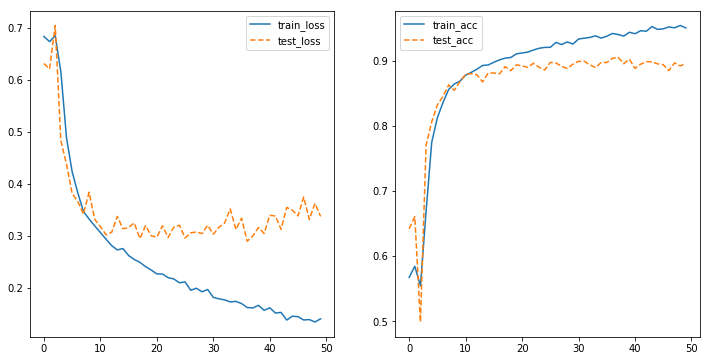

In [18]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))




ax[0].plot(d['train_loss'], label='train_loss')
ax[0].plot(d['test_loss'], '--', label='test_loss')


ax[1].plot(d['train_acc'], label='train_acc')
ax[1].plot(d['test_acc'], '--', label='test_acc')

ax[0].legend()

ax[1].legend()

In [15]:

for file in os.listdir("logs"):
    fname = os.path.join("logs", file)
    with open(fname, 'rb') as f:
        d = pickle.load(f)
        print(file, max(d['test_acc']))

test.pickle 0.8757352941786237
test2.pickle 0.8750399616368286
no_tt_embed_256_seq_None.pickle 0.8929267903727949
tt_voc_10_10_10_5_5_embed_4_4_2_2_2_seq_500.pickle 0.8808663682559567
no_tt_embed_128_seq_500.pickle 0.895164642035199
tt_voc_5_2_5_2_5_2_5_5_embed_2_2_2_2_2_2_1_1_seq_500.pickle 0.8847186701072146
no_tt_embed_64_seq_None.pickle 0.8964194373401535
no_tt_embed_256_seq_500.pickle 0.8939418158567775
tt_voc_5_2_5_2_5_2_5_5_embed_2_2_2_2_2_2_1_1_seq_None.pickle 0.8613970589149943
no_tt_embed_64_seq_500.pickle 0.8964673913348361
tt_voc_10_10_10_5_5_embed_4_4_2_2_2_seq_None.pickle 0.9056585678054244
tt_voc_50_50_10_embed_8_8_4_seq_500.pickle 0.9005115090123833


In [ ]:
experiment = Experiment(api_key="B0CgbWkje7xxf175uEKXRKxMB",
                        project_name="tt-imdb", workspace="khrulkovv")

In [30]:
params = {'tt':False,
          'seq':500,
          'embed_dim':128
}

In [31]:
experiment.log_parameters(params)

In [32]:
with experiment.train():
    with open('logs/no_tt_embed_128_seq_500.pickle', 'rb') as f:
        d = pickle.load(f)
    
    
    for i in range(50):
        experiment.log_metric("loss", d['train_loss'][i], step=i)
        experiment.log_metric("accuracy", d['train_acc'][i], step=i)
        
        
with experiment.test():
    for i in range(50):
        experiment.log_metric("loss", d['test_loss'][i], step=i)
        experiment.log_metric("accuracy", d['test_acc'][i], step=i)

In [34]:
embed_shapes_full = [64, 128, 256]
seq_len = [500, None]

In [35]:
script_full = 'python train_lstm.py --use_tt False --voc_shape 25000 --embed_shape {} --gpu {} --fout {} {} --n_epochs 50'

In [36]:
path = 'logs/no_tt_embed_{}_seq_{}.pickle'

In [42]:
for shape in embed_shapes_full:
    for l in seq_len:
        out_name = path.format(shape, l)
        
        

        try:
            with open(out_name, 'rb') as f:
                d = pickle.load(f)
                
                experiment = Experiment(api_key="B0CgbWkje7xxf175uEKXRKxMB", 
                                        project_name="tt-imdb", 
                                        workspace="khrulkovv")
                
                params = {'tt':False,
                          'seq':l,
                          'embed_dim':shape}
                
                experiment.log_parameters(params)
                
                
                with experiment.train():
                    for i in range(50):
                        experiment.log_metric("loss", d['train_loss'][i], step=i)
                        experiment.log_metric("accuracy", d['train_acc'][i], step=i)
        
        
                with experiment.test():
                    for i in range(50):
                        experiment.log_metric("loss", d['test_loss'][i], step=i)
                        experiment.log_metric("accuracy", d['test_acc'][i], step=i)
                
                
                
        except:
            pass
    

COMET INFO: Experiment is live on comet.ml https://www.comet.ml/khrulkovv/tt-imdb/abd37af0e92643b682098bd0dae301a7

COMET ERROR: Failed to log git metadata
COMET ERROR: Failed to log git patch
COMET INFO: Experiment is live on comet.ml https://www.comet.ml/khrulkovv/tt-imdb/1309b9ce542d4c0d9b6e0777bf2cd730

COMET INFO: Experiment is live on comet.ml https://www.comet.ml/khrulkovv/tt-imdb/1309b9ce542d4c0d9b6e0777bf2cd730

COMET ERROR: Failed to log git metadata
COMET ERROR: Failed to log git patch
COMET INFO: Experiment is live on comet.ml https://www.comet.ml/khrulkovv/tt-imdb/1804f53956324337b3b8796c944d0ab5

COMET INFO: Experiment is live on comet.ml https://www.comet.ml/khrulkovv/tt-imdb/1804f53956324337b3b8796c944d0ab5

COMET ERROR: Failed to log git metadata
COMET ERROR: Failed to log git patch
COMET INFO: Experiment is live on comet.ml https://www.comet.ml/khrulkovv/tt-imdb/6955e8cf9fa0484581654a62ceb8e7f7

COMET INFO: Experiment is live on comet.ml https://www.comet.ml/khrulkovv